In [98]:
#Importing Packages
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from copy import deepcopy

In [231]:
#Convert the libsvm format IRIS dataset to dataframe
file = open("iris.scale.txt")
df=pd.DataFrame(np.zeros((150,5)))
for ind,line in enumerate(file):
    line=line.split()
    df[0][ind] = line[0]
    for i in line[1:]:
        df[int(i[0])][ind] = i[2:]

In [233]:
y=df[0]
v=df.drop(df.columns[0], axis=1)
v.head(4)
x=v

,1,2,3,4
0,-0.555556,0.250000,-0.864407,-0.916667
1,-0.666667,-0.166667,-0.864407,-0.916667
2,-0.777778,0.000000,-0.898305,-0.916667
3,-0.833333,-0.083333,-0.830508,-0.916667


In [396]:
x.shape

(150, 4)

In [427]:
""""def euclideanDistance(a, b):    
    temp = a - b
    temp = (temp*temp)
    c=temp.reshape(32659,1)
    temp=np.dot(temp,c)
    squaredSum = temp.sum()
    return sqrt(squaredSum)""""
#Centroids
def centroids(k):
    centroids=[]
    c = x[np.random.randint(0,len(x))]
    centroids.append(c)
    for i in range(k-1):
        c_new = x[max_dist(c)]
        if c_new not in np.unique(centroids, axis=0):
            centroids.append(c_new)
            c=c_new
        else :
            c_new = x[np.random.randint(0,len(x))]
            centroids.append(c_new)
    return centroids
#EuclideanDistance
def euclideanDistance(a, b):
    a = np.array(a) 
    b = np.array(b)
    return np.sqrt(np.sum(np.square(a - b)))
#Clusters of the dataset
def clusters(centroids):
    clusters = np.zeros(len(x))
    for j in range(len(x)):
        dist=[]
        for i in iter(list(centroids)):
            dist.append(euclideanDistance(x[j], i))
        cluster = np.argmin(dist)
        clusters[j] = cluster
    return clusters
#Returns the index of Maximum distant centroid 
def max_dist(c):
    distances=[]
    for i in range(len(x)):
        distances.append(euclideanDistance(x[i], c))
    return np.argmax(distances)
#Load the NewsArticle dataset
def load_data(dir):
    y = []
    x = []
    for fol in os.listdir(dir):
        for f in os.listdir(dir+"/"+str(fol)):
            with open(dir+"/"+str(fol)+"/"+str(f), 'rb') as file:
                x.append(file.read().decode('cp1252').encode("utf-8"))
                y.append(fol)
    return x, y

In [434]:
cent= centroids(6)
clus=clusters(cent)

In [436]:
#For K=6 K-Means clustering
k=6
cent_new=[]
sse_list=[]
for m in range(k):
    points = [x[k] for k in range(len(x)) if clus[k] == m]
    cent_new.append(np.mean(points, axis=0))
count=0 
while np.array_equal(cent_new,cent) == False :
    count = count + 1
    #print("\nold centroid" +str(cent))
    #print("\nnew centroid" +str(cent_new))
    cent = deepcopy(cent_new)
    clus=clusters(cent)
    #print(clus)
    cent_new=[]
    sse_dist=[]
    for m in range(k):
        points = [x[k] for k in range(len(x)) if clus[k] == m]
        #print("\n")
        #print(points)
        cent_new.append(np.mean(points, axis=0))
        for j in range(len(points)):
            sse_dist.append(euclideanDistance(points[j], cent_new[-1]))
sse_list.append(np.sum(np.square(sse_dist)))
#print("Converged in Iterations" +str(count))
print(sse_list)

[18.542039616563507]


In [453]:
#Implementing K-Means from K=1 to 8 
max_itr = 50
sse_list=[]
for k in range(1,8):
    
    print("\nK value :"+str(k))
    cent= centroids(k)
    clus=clusters(cent)
    cent_new=[]
    for m in range(k):
        points = [x[k] for k in range(len(x)) if clus[k] == m]
        cent_new.append(np.mean(points, axis=0))
    count=0    
    while np.array_equal(cent_new,cent) == False :
        count = count + 1
        #print("\nold centroid " +str(cent))
        #print("\nnew centroid " +str(cent_new))
        cent = deepcopy(cent_new)
        clus=clusters(cent)
        cent_new=[]
        sse_dist=[]
        for m in range(k):
            points = [x[k] for k in range(len(x)) if clus[k] == m]
            cent_new.append(np.mean(points, axis=0))
            for j in range(len(points)):
                sse_dist.append(euclideanDistance(points[j], cent_new[-1]))
            if count > max_itr :
                break
    print(np.sum(np.square(sse_dist)))
    sse_list.append(np.sum(np.square(sse_dist)))        
    print("\n\nConverged in Iterations " +str(count))    


K value :1
164.5526773463016


Converged in Iterations 1

K value :2
48.574745171474284


Converged in Iterations 4

K value :3
27.992453520801508


Converged in Iterations 4

K value :4
22.13132224532135


Converged in Iterations 7

K value :5
18.322999347220673


Converged in Iterations 6

K value :6
15.663200265337682


Converged in Iterations 9

K value :7
14.508808674682175


Converged in Iterations 8


In [454]:
#SSE list for K= 1 to 8
sse_list

[164.5526773463016,
 48.574745171474284,
 27.992453520801508,
 22.13132224532135,
 18.322999347220673,
 15.663200265337682,
 14.508808674682175]

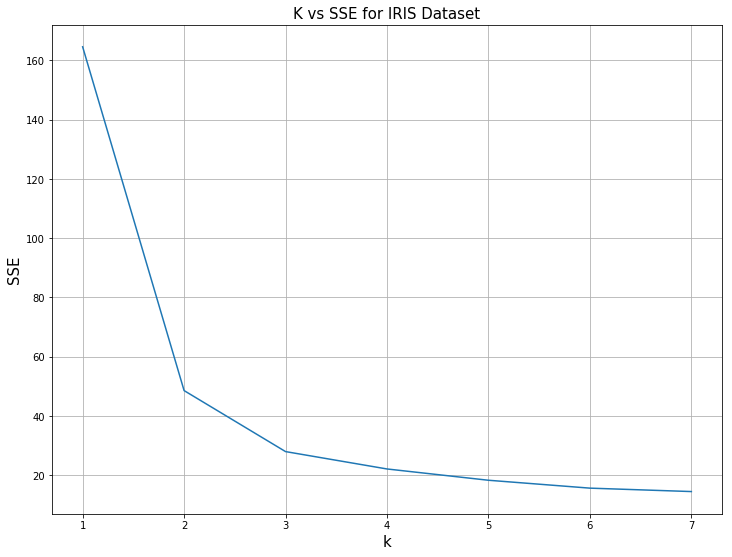

In [462]:
#Plot using above implementation of K-Means 
k=range(1,8)
plt.figure(figsize=(12,9))
plt.plot(k, sse_list)
plt.grid()
plt.xlabel('k', fontsize = 15)
plt.ylabel('SSE', fontsize = 15)
plt.title("K vs SSE for IRIS Dataset", fontsize = 15)
plt.show()

#### By Elbow Method, the Optimal value of K for IRIS dataset is found to be 3.

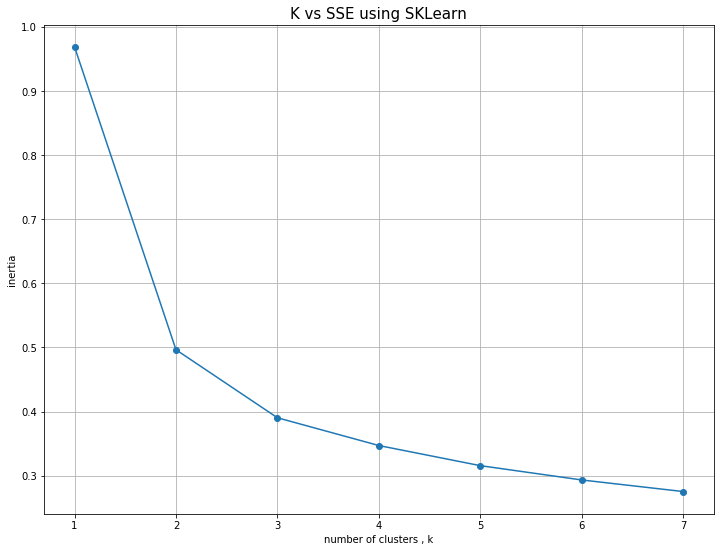

In [463]:
#Implementation of K-means using SKLearn and its plot
ks = range(1, 8)
inertia = []
for i in ks:
    model = KMeans(n_clusters= i).fit(x)    
    model.fit(x)    
    inertia.append(sum(np.min(cdist(x, model.cluster_centers_, 'euclidean'), axis = 1))/x.shape[0])    
plt.figure(figsize=(12,9))
plt.plot(ks, inertia, '-o')
plt.grid()
plt.xlabel('number of clusters , k')
plt.ylabel('inertia')
plt.title("K vs SSE using SKLearn", fontsize = 15)
plt.xticks(ks)
plt.show()

In [458]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import os

In [565]:
#Loading News Article dataset
xT, yT = load_data("20news-bydate/20news-bydate-train")
xtest, ytest = load_data("20news-bydate/20news-bydate-test")

In [567]:
v = TfidfVectorizer(stop_words = 'english',lowercase = True, ngram_range=(1, 3))
xTrain = v.fit_transform(xT)
xTest = v.transform(xtest)

C:\Users\HP\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [473]:
xTrain.shape

(11314, 32659)

In [474]:
xTest.shape

(7532, 32659)

In [544]:
d = {}
ind = 1
for i in set(yT):
    d[i] = ind
    ind = ind + 1
yTrain = [d[x] for x in yT]
yTest = [d[x] for x in ytest]
xt=xTrain[:1000]
x=xt.todense()
x.shape

(1000, 32659)

In [546]:
x=np.nan_to_num(x)
x.shape

(1000, 32659)

In [547]:
lenth=x.shape[0]

In [600]:
def dd(a, b):    
    temp = a - b
    #temp = (temp*temp)
    c=temp.reshape(32659,1)
    temp=np.dot(temp,c)
    squaredSum = temp.sum()
    return sqrt(squaredSum)
def max_dist(c):
    distances=[]
    for i in range(lenth):
        distances.append(dd(x[i], c))
    return np.argmax(distances)
def centroids(k):
    centroids=[]
    c = x[np.random.randint(0,lenth)]
    centroids.append(c)
    for i in range(k-1):
        centroids.append(x[np.random.randint(0,lenth)])
        #c_new = x[max_dist(c)]
        #print(max_dist(c))
        #print(c_new)
       # print(centroids)
        #if np.array_equal(centroids,c_new) == False:
        #if c_new not in np.unique(centroids):
        #if c_new not in centroids:
            #c_new = x[np.random.randint(0,lenth)]
            #centroids.append(c_new)
            #c=c_new
        #else :
            #print("else")
            #c_new = x[np.random.randint(0,lenth)]
            #print(c_new)
            #centroids.append(c_new)
    return centroids
def clusters(centroids):
    clusters = np.zeros(lenth)
    for j in range(lenth):
        dist=[]
        for i in iter(list(centroids)):
            dist.append(dd(x[j], i))
        cluster = np.argmin(dist)
        clusters[j] = cluster
    return clusters

In [604]:
cent= centroids(20)
print(cent)
clus=clusters(cent)

[matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0.08638026, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0.       , 0.       , 0.       , ..., 0.1100591, 0.1100591,
         0.       ]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]])]


In [602]:
#K-means using my implementation with K=20
k=20
cent_new=[]
sse_list=[]
for m in range(k):
    points = [x[k] for k in range(lenth) if clus[k] == m]
    cent_new.append(np.mean(points, axis=0))
count=0 
while np.array_equal(cent_new,cent) == False :
    count = count + 1
    print("\nold centroid" +str(cent))
    print("\nnew centroid" +str(cent_new))
    cent = deepcopy(cent_new)
    clus=clusters(cent)
    #print(clus)
    cent_new=[]
    sse_dist=[]
    for m in range(k):
        points = [x[k] for k in range(lenth) if clus[k] == m]
        #print("\n")
        #print(points)
        cent_new.append(np.mean(points, axis=0))
        for j in range(len(points)):
            sse_dist.append(dd(points[j], cent_new[-1]))
sse_list.append(np.sum(np.square(sse_dist)))
print("Converged in Iterations" +str(count))
print(sse_list)

C:\Users\HP\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\HP\Anaconda\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



old centroid[matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.]])]

new centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), n


old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1


old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1


old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1


old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1


old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1


old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1


old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1


old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1


old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1


old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1


old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1


old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1


old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1


old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1


old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[nan, array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

new centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1.03554960e-03, 1.03554960e-03, 0.00000000e+00]]), nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

old centroid[array([[1.37430827e-03, 7.18775287e-05, 0.00000000e+00, ...,
        1

KeyboardInterrupt: 

In [491]:
#Implementation of K-means using SKLearn and its plot
import datetime
start = datetime.datetime.now()
ks = range(8, 25)
inertia = []
for i in ks:
    kmeans = KMeans(n_clusters=i, n_init = 1)
    kmeans.fit(xTrain, yTrain)
    print(kmeans.inertia_)
    inertia.append(kmeans.inertia_)
end = datetime.datetime.now()

11026.60809967372
10991.463730172227
10983.636443475085
10947.170146492641
10911.6965696456
10913.49172160891
10874.1048004594
10895.676236814581
10844.932107040988
10848.185035432509
10796.135453128783
10813.064981249194
10794.485791735386
10796.501476474363
10774.161819095198
10736.441985384521
10738.790668587344


In [493]:
print("The time taken is "+str(end-start))

The time taken is 0:31:22.146380


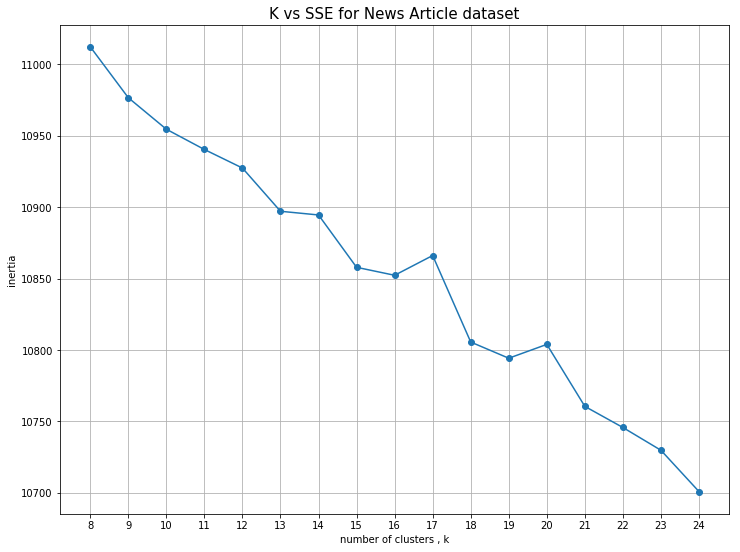

In [488]:
plt.figure(figsize=(12,9))
plt.plot(ks, inertia, '-o')
plt.grid()
plt.xlabel('number of clusters , k')
plt.ylabel('inertia')
plt.title("K vs SSE for News Article dataset", fontsize = 15)
plt.xticks(ks)
plt.show()

#### The Optimal value of K for News article dataset is 20 